In [32]:
%matplotlib nbagg

In [2]:
import logging

root = logging.root
for h in root.handlers:
    h.setLevel("INFO")

In [3]:
import dedalus.public as de
import numpy as np
import matplotlib.pylab as plt

In [4]:
plt.style.use('ggplot')

In [57]:
nr1 = 100
r1 = de.Chebyshev('r', nr1)
d1 = de.Domain([r1])

nr2 = 192
r2 = de.Chebyshev('r', nr2)
d2 = de.Domain([r2])

In [58]:
# critical parameters
Rm = 4.879
iRm = 1.0/Rm
Pm = 0.001
Re = Rm/Pm
iR = 1.0/Re
q = 1.5
Q = 0.748
beta = 25.0

In [59]:
widegap = de.EVP(d1,['psi','u', 'A', 'B', 'psir', 'psirr', 'psirrr', 'ur', 'Ar', 'Br'],'sigma')
widegap.parameters['Q'] = Q
widegap.parameters['iR'] = iR
widegap.parameters['iRm'] = iRm
widegap.parameters['q'] = q
widegap.parameters['beta'] = beta

2016-04-18 16:37:44,759 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


Linear widegap MRI equations multiplied by $r^4$

$\left[\begin{matrix}- 3.0 i \Omega_{0} Q r^{4} r^{- q} u{\left (t,r,z \right )} - \frac{1.0 r^{3}}{R_{e}} Q^{4} \psi{\left (t,r,z \right )} + \frac{2.0 i}{\beta} Q^{3} r^{3} A{\left (t,r,z \right )} + \frac{2.0 d_{r}^{2}}{R_{e}} Q^{2} r^{3} \psi{\left (t,r,z \right )} - \frac{2.0 d_{r}}{R_{e}} Q^{2} r^{2} \psi{\left (t,r,z \right )} - \frac{2.0 i}{\beta} Q d_{r}^{2} r^{3} A{\left (t,r,z \right )} + \frac{2.0 i}{\beta} Q d_{r} r^{2} A{\left (t,r,z \right )} - \frac{d_{r}^{4} r^{3}}{R_{e}} \psi{\left (t,r,z \right )} + \frac{2 d_{r}^{3}}{R_{e}} r^{2} \psi{\left (t,r,z \right )} - \frac{3 r}{R_{e}} d_{r}^{2} \psi{\left (t,r,z \right )} + \frac{3 d_{r}}{R_{e}} \psi{\left (t,r,z \right )}\\- 1.0 i \Omega_{0} Q q r^{3} r^{- q} \psi{\left (t,r,z \right )} + 4.0 i \Omega_{0} Q r^{3} r^{- q} \psi{\left (t,r,z \right )} + \frac{1.0 r^{4}}{R_{e}} Q^{2} u{\left (t,r,z \right )} - \frac{2.0 i}{\beta} Q r^{4} B{\left (t,r,z \right )} - \frac{d_{r}^{2} r^{4}}{R_{e}} u{\left (t,r,z \right )} - \frac{d_{r} r^{3}}{R_{e}} u{\left (t,r,z \right )} + \frac{r^{3}}{R_{e}} u{\left (t,r,z \right )}\\\frac{1.0 r^{4}}{R_{m}} Q^{2} A{\left (t,r,z \right )} - 1.0 i Q r^{4} \psi{\left (t,r,z \right )} - \frac{d_{r}^{2} r^{4}}{R_{m}} A{\left (t,r,z \right )} + \frac{d_{r} r^{3}}{R_{m}} A{\left (t,r,z \right )}\\1.0 i \Omega_{0} Q q r^{3} r^{- q} A{\left (t,r,z \right )} - 2.0 i \Omega_{0} Q r^{3} r^{- q} A{\left (t,r,z \right )} + \frac{1.0 r^{4}}{R_{m}} Q^{2} B{\left (t,r,z \right )} - 1.0 i Q r^{4} u{\left (t,r,z \right )} - \frac{d_{r}^{2} r^{4}}{R_{m}} B{\left (t,r,z \right )} - \frac{d_{r} r^{3}}{R_{m}} B{\left (t,r,z \right )} + \frac{r^{2}}{R_{m}} B{\left (t,r,z \right )}\end{matrix}\right]$ 
+ $\left[\begin{matrix}- 1.0 Q^{2} r^{3} \sigma \psi{\left (t,r,z \right )} + d_{r}^{2} r^{3} \sigma \psi{\left (t,r,z \right )} - d_{r} r^{2} \sigma \psi{\left (t,r,z \right )}\\r^{4} \sigma u{\left (t,r,z \right )}\\r^{4} \sigma A{\left (t,r,z \right )}\\r^{4} \sigma B{\left (t,r,z \right )}\end{matrix}\right]$
= 0

In [60]:
widegap.add_equation("sigma*(-1*Q**2*r**3*psi + r**3*psirr - r**2*psir) - 3*1j*Q*r**(4 - q)*u - iR*r**3*Q**4*psi + (2/beta)*1j*Q**3*r**3*A + iR*2*Q**2*r**3*psirr - iR*2*Q**2*r**2*psir - (2/beta)*1j*Q*r**3*dr(Ar) + (2/beta)*1j*Q*r**2*Ar - iR*r**3*dr(psirrr) + 2*iR*r**2*psirrr - iR*3*r*psirr + iR*3*psir = 0")
widegap.add_equation("sigma*(r**4*u) - 1j*Q*q*r**(3 - q)*psi + 4*1j*Q*r**(3 - q)*psi + iR*r**4*Q**2*u - (2/beta)*1j*Q*r**4*B - iR*r**4*dr(ur) - iR*r**3*ur + iR*r**3*u = 0")
widegap.add_equation("sigma*(r**4*A) + iRm*r**4*Q**2*A - 1j*Q*r**4*psi - iRm*r**4*dr(Ar) + iRm*r**3*Ar = 0")
widegap.add_equation("sigma*(r**4*B) + 1j*Q*q*r**(3 - q)*A - 2*1j*Q*r**(3 - q)*A + iRm*r**4*Q**2*B - 1j*Q*r**4*u - iRm*r**4*dr(Br) - iRm*r**3*Br + iRm*r**2*B = 0")

In [61]:
widegap.add_equation("dr(psi) - psir = 0")
widegap.add_equation("dr(psir) - psirr = 0")
widegap.add_equation("dr(psirr) - psirrr = 0")
widegap.add_equation("dr(u) - ur = 0")
widegap.add_equation("dr(A) - Ar = 0")
widegap.add_equation("dr(B) - Br = 0")

In [62]:
widegap.add_bc('left(u) = 0')
widegap.add_bc('right(u) = 0')
widegap.add_bc('left(psi) = 0')
widegap.add_bc('right(psi) = 0')
widegap.add_bc('left(A) = 0')
widegap.add_bc('right(A) = 0')
widegap.add_bc('left(psi + r*psir) = 0')
widegap.add_bc('right(psi + r*psir) = 0')
widegap.add_bc('left(B + r*Br) = 0')
widegap.add_bc('right(B + r*Br) = 0')

In [63]:
solver = widegap.build_solver()

In [70]:
widegap2 = de.EVP(d2,['psi','u', 'A', 'B', 'psir', 'psirr', 'psirrr', 'ur', 'Ar', 'Br'],'sigma')
widegap2.parameters['Q'] = Q
widegap2.parameters['iR'] = iR
widegap2.parameters['iRm'] = iRm
widegap2.parameters['q'] = q
widegap2.parameters['beta'] = beta
widegap2.add_equation("sigma*(-1*Q**2*r**3*psi + r**3*psirr - r**2*psir) - 3*1j*Q*r**(4 - q)*u - iR*r**3*Q**4*psi + (2/beta)*1j*Q**3*r**3*A + iR*2*Q**2*r**3*psirr - iR*2*Q**2*r**2*psir - (2/beta)*1j*Q*r**3*dr(Ar) + (2/beta)*1j*Q*r**2*Ar - iR*r**3*dr(psirrr) + 2*iR*r**2*psirrr - iR*3*r*psirr + iR*3*psir = 0")
widegap2.add_equation("sigma*(r**4*u) - 1j*Q*q*r**(3 - q)*psi + 4*1j*Q*r**(3 - q)*psi + iR*r**4*Q**2*u - (2/beta)*1j*Q*r**4*B - iR*r**4*dr(ur) - iR*r**3*ur + iR*r**3*u = 0")
widegap2.add_equation("sigma*(r**4*A) + iRm*r**4*Q**2*A - 1j*Q*r**4*psi - iRm*r**4*dr(Ar) + iRm*r**3*Ar = 0")
widegap2.add_equation("sigma*(r**4*B) + 1j*Q*q*r**(3 - q)*A - 2*1j*Q*r**(3 - q)*A + iRm*r**4*Q**2*B - 1j*Q*r**4*u - iRm*r**4*dr(Br) - iRm*r**3*Br + iRm*r**2*B = 0")
widegap2.add_equation("dr(psi) - psir = 0")
widegap2.add_equation("dr(psir) - psirr = 0")
widegap2.add_equation("dr(psirr) - psirrr = 0")
widegap2.add_equation("dr(u) - ur = 0")
widegap2.add_equation("dr(A) - Ar = 0")
widegap2.add_equation("dr(B) - Br = 0")
widegap2.add_bc('left(u) = 0')
widegap2.add_bc('right(u) = 0')
widegap2.add_bc('left(psi) = 0')
widegap2.add_bc('right(psi) = 0')
widegap2.add_bc('left(A) = 0')
widegap2.add_bc('right(A) = 0')
widegap2.add_bc('left(psi + r*psir) = 0')
widegap2.add_bc('right(psi + r*psir) = 0')
widegap2.add_bc('left(B + r*Br) = 0')
widegap2.add_bc('right(B + r*Br) = 0')

solver2 = widegap2.build_solver()


2016-04-18 16:47:21,330 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


In [ ]:
solver.solve(solver.pencils[0])
solver2.solve(solver2.pencils[0])

In [17]:
ev = solver.eigenvalues
eigenvalues_keys = solver.eigenvalues.argsort()

In [49]:
marginal_mode_index = np.where(ev.real == np.nanmax(ev.real[np.isfinite(ev.real)]))[0][0]

In [50]:
marginal_mode_index

6

In [51]:
rr  = r.grid()
evector = solver.eigenvectors[marginal_mode_index]

In [52]:
solver.set_state(marginal_mode_index)
data = solver.state
psi = data['psi']

print(ev[marginal_mode_index])

(98078.6764686-68366.712713j)


<IPython.core.display.Javascript object>


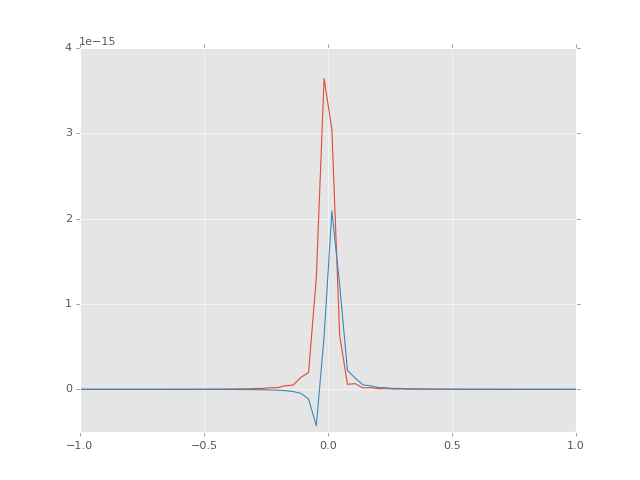

In [56]:
plt.figure()
plt.plot(rr, (data['B']['g']).real, label='real')
plt.plot(rr, (data['B']['g']).imag, label='imag')